In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
f = '/home/soontiensn/repos/drifters/drift-analysis/nancy/MEOPAR-TREX/MEOPAR_TREX_osker_20201028.csv'
d = pd.read_csv(f)
groups = d.groupby('Device')

In [3]:
lon_min=-69
lon_max=-50
lat_min=45
lat_max=50
mydevice=''


In [4]:
def plot_tracks(groups, ax):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, 2.),labels=[1,0,0,0])
    bmap.drawmeridians(np.arange(lon_min, lon_max,2.), labels=[0,0,0,1])
    bmap.drawcoastlines()
    for g, dg in groups:
        x,y = bmap(dg['Longitude'].values, dg['Latitude'].values)
        lw=1
        label='__nolabel__'
        color='C0'
        if g == mydevice:
            lw=4
            label = 'Recovered device track'
            color='C1'
        bmap.plot(x,y,linewidth=lw, label=label,color=color)
        bmap.plot(x[-1],y[-1],'o',color='C2',label='__nolabel__')
        bmap.plot(x[0],y[0],'o',color='C3',label='__nolabel__')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


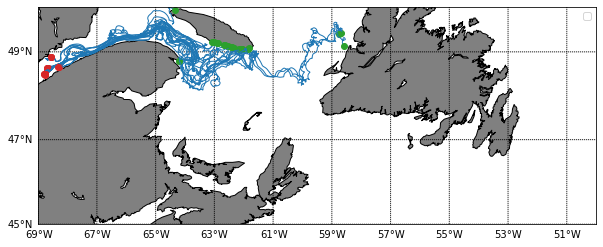

In [5]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
plot_tracks(groups,ax)
ax.legend()

In [6]:
#fig.savefig('CapeBretonRecovery2.png', bbox_inches='tight')